# LGM-VIP Data Science Internship Programme
# Advanced Level Task-4
# Name: ML Facial recognition to detect mood and suggest songs accordingly

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [4]:
dataset = files.upload()

Saving Dataset.zip to Dataset.zip


In [ ]:
!unzip Dataset.zip

In [15]:
!ls

Dataset  Dataset.zip  sample_data


In [16]:
train_dir = "/content/Dataset/train"
test_dir = "/content/Dataset/test"

In [17]:
img_size = 48

In [18]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [19]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [20]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [21]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
epochs = 20
batch_size = 64

In [23]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/20
359/359 [==============================] - 971s 3s/step - loss: 9.3400 - accuracy: 0.1887 - val_loss: 8.7541 - val_accuracy: 0.2451
Epoch 2/20
359/359 [==============================] - 977s 3s/step - loss: 8.3669 - accuracy: 0.2173 - val_loss: 7.6295 - val_accuracy: 0.2758
Epoch 3/20
359/359 [==============================] - 975s 3s/step - loss: 7.4197 - accuracy: 0.2379 - val_loss: 6.6943 - val_accuracy: 0.3156
Epoch 4/20
359/359 [==============================] - 959s 3s/step - loss: 6.5040 - accuracy: 0.2624 - val_loss: 5.8290 - val_accuracy: 0.3387
Epoch 5/20
359/359 [==============================] - 956s 3s/step - loss: 5.6479 - accuracy: 0.2976 - val_loss: 5.0600 - val_accuracy: 0.3757
Epoch 6/20
359/359 [==============================] - 955s 3s/step - loss: 4.9014 - accuracy: 0.3274 - val_loss: 4.3540 - val_accuracy: 0.4071
Epoch 7/20
359/359 [==============================] - 956s 3s/step - loss: 4.2456 - accuracy: 0.3593 - val_loss: 3.8792 - val_accuracy: 0.3778

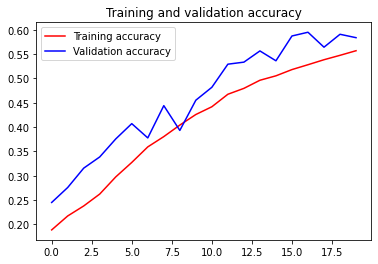

<Figure size 432x288 with 0 Axes>

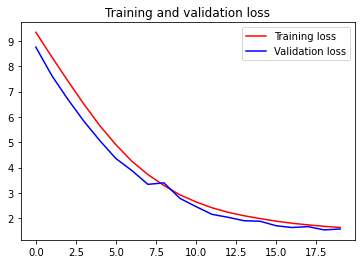

In [24]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [25]:
model.save('model_fer2013.h5')

In [26]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 13s 564ms/step - loss: 1.5723 - accuracy: 0.5838
final train accuracy = 59.52 , validation accuracy = 58.38


(48, 48)


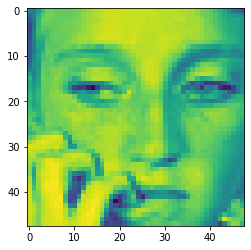

In [31]:
img = image.load_img("/content/Dataset/test/fear/PrivateTest_11014592.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [32]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [33]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 8.3675565e-24, 3.8165634e-17, 0.0, 0.99999976, 2.5638187e-07, 0.0]


In [34]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Neutral


In [35]:
model.save_weights('model_weights.h5')